# Principal Component Analysis:
    
**Principal Components Analysis** (PCA) is a technique that finds underlying variables (known as principal components) that 
best differentiate your data points. Principal components are dimensions along which your data points are most spread out.
A principal component can be expressed by one or more existing variables.

In this tutorial I'll explain the steps involved in PCA with codes.In the end we'll see the shortcut(alternative) way to apply PCA using Scikit-learn(a python library to apply machine learning algorithms).The main aim of this tutorial is to explain what actually happens in background when you apply PCA algorithm.

# 1)Let us first import all the necessary libraries 

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing library, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualisation library
import seaborn as sns # visualisation library based on matplotlib
% matplotlib inline  
# magic command to display plots in jupyter notebook.You can also use plt.show() at the end of the code 
# to display the plots instead of this.

# 2)Loading the dataset

To import the dataset we will use Pandas library.It is the best Python library to play with the dataset and has a lot of functionalities. If you are not aware of this library I will encourage you to look at it here:
(http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

In [30]:
df = pd.read_csv('C:\Users\Niraj Verma\Desktop\Data csv files\HR_comma_sep.csv')

**pd.read_csv** read CSV (comma-separated) file into DataFrame**(df)**.DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table.Since most of the datasets are comma separated values pandas has different functionality to read such files.Brackets contains the path where my CSV file is stored.You can replace it with your path.
The csv file you can find in my github repository:
(https://github.com/nirajvermafcb/Principal-component-analysis-PCA-)

# 3)Checking various features of the datasets

In [31]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


**df.columns.tolist()** fetches all the columns and then convert it into list type.This step is just to check out all the column names in our data.Columns are also called as features of our datasets. 

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**df.head()** displays first five rows of our datasets.
You can also specify the number of rows to be displayed by passing the arguments inside the brackets.
For example below code shows 10 rows of our dataframe.

In [33]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [34]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


**df.corr()** compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa.

### Visualising correlation using Seaborn library

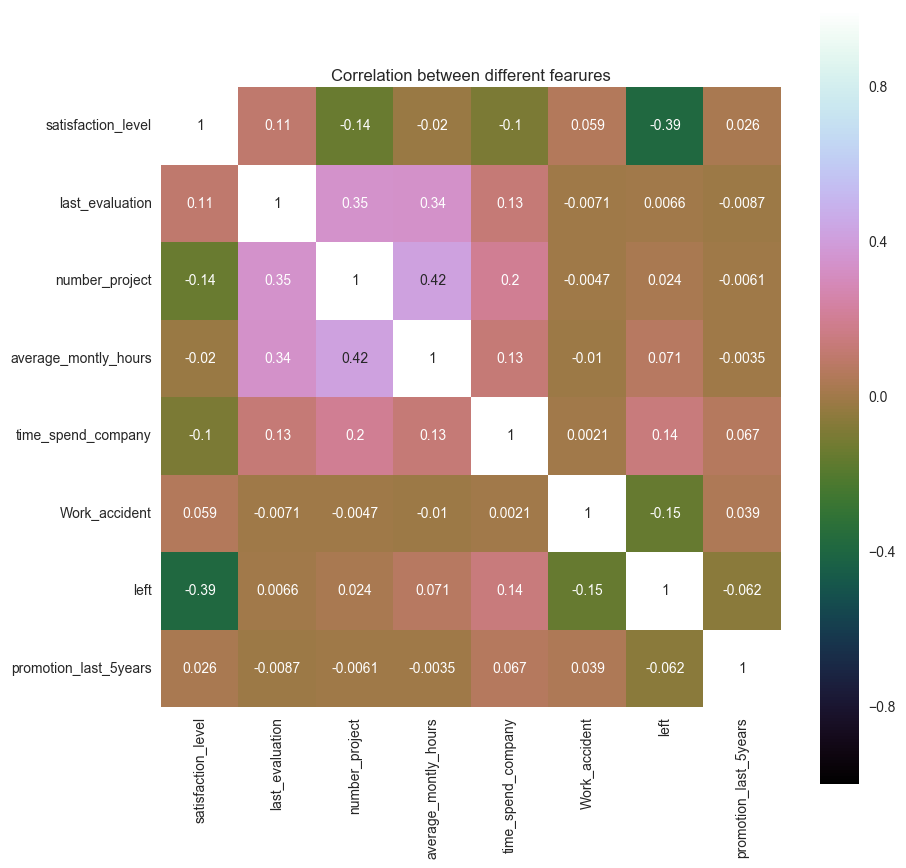

In [35]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

##### Steps in visualisation #####
**1)** Firstly we stored df.corr() correlation matrix in correlation variable.
**2)**plt.figure() is the function to display figure with different parameters.Here we have passed figsize(10,10) which width and height of the figure in inches respectively.
**3)**sns.heatmap()function tries to infer a good colormap to use from the data.Here our data is correlation which is passed as a first parameter.
Our 2nd parameter is square() which takes boolean values.Default value is false.Here we have set it as True so that are grid is in Square shape.
Our 3rd paramter is annot() which takes boolean values.Default value is false. Here when we set it as true it displays values in each cell.
Our 4th paramter is cmap which is matplotlib colormap name or object. It displays various colors for our grid.
**4)**plt.title() displays the title of the figure at the top.



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**df.info()** is the method to see the number of rows in the dataframe and its datatype.We can see that sales and salary are object which basically means string.That's why we need to drop those columns.

In [37]:
df_drop=df.drop(labels=['sales','salary'],axis=1)
df_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


**df.drop()** is the method to drop the columns in our dataframe.By passing **labels=['sales','salary']** as the parameter we are specifying which columns we need to drop.**axis=1** says we need to drop the entire columns and not the rows.For rows it is **axis=0**.Also the original dataframe is unharmed.It still contain all the columns.Only df_drop contains the dataframe with dropped columns.
To drop the columns permanently we need to pass one more parameter which is **inplace=true**.By default it is false.

<br/>

Now we need to bring "left" column to the front as it is the label and not the feature.In the end we need to predict whether the person will leave the job or not based on those features.Thus we need to reshuffle the columns and bring "left" column to the front.

In [38]:
cols = df_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

Here we are converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.We are going to use cols.insert method

In [39]:
cols.insert(0, cols.pop(cols.index('left')))

**cols.index('left')** separate index column from the dataframe.Thus we have **cols.pop(cols.index('left'))==cols.pop('Left')**. **cols.pop()** remove the column and insert it at index 0 which is the first column of our dataframe.

In [40]:
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [41]:
df_drop = df_drop.reindex(columns= cols)

By using **df_drop.reindex(columns= cols)** we are converting list to columns again

<br/>

Now we are separating features of our dataframe from the labels.
The syntax **df_drop.iloc[:,1:8]** means select all the columns from 1 to 7.The last number is excluded.Thus all the features gets stored in variable X.iloc is the method which select columns based on its index.The **:** before the **,** means select all the rows of the dataframe.Similarly we stored the first column which is the label in variable y.


In [42]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[ 0.38,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.86,  5.  , ...,  6.  ,  0.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  4.  ,  0.  ,  0.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.11,  0.96,  6.  , ...,  4.  ,  0.  ,  0.  ],
       [ 0.37,  0.52,  2.  , ...,  3.  ,  0.  ,  0.  ]])

In [43]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
np.shape(X)

(14999L, 7L)

Thus X is now matrix with 14999 rows and 7 columns

In [45]:
np.shape(y)

(14999L,)

y is now matrix with 14999 rows and 1 column

# 4) Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).
It is useful to standardize attributes for a model.It is most suitable for techniques that assume a Gaussian distribution(mean=0 and variance=1) in the input variables and work better with rescaled data.Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data .Hence one feature can dominate others if data is not rescaled. Thus data standardisation is necessary for every machine learning algorithm to work properly.

In [46]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

The **sklearn.preprocessing** package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable.The **preprocessing** module further provides a utility class **StandardScaler** that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.It is possible to disable either centering or scaling by either passing **with_mean=False** or **with_std=False** to the constructor of **StandardScaler**. **fit_transform** fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

# 5)  Computing Eigenvectors and Eigenvalues:
The eigenvectors and eigenvalues of a covariance matrix represent the “core” of a PCA:
The Eigenvectors are the principal components which determines the directions of the new feature space and the eigen values determine their magnitude.Eigen values determines the variance along the new feature axes in the new dimensions. The 


## Covariance matrix:
We need to calculate eigen vectors and eigen values for covariance matrix.
The calculation of the covariance matrix via the following matrix equation: 
         Σ=((X−x¯)T(X−x¯)) / 1n−1

where x¯ is the mean vector

In [47]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


First we have calculated mean of the X_std matrix along each row(axis=0) and stored it in mean_vec.Then we have calculated covariance matrix using the above formula and stored it in cov_mat. here **.T** represents transpose and .**dot** represents dot product alongside each element.**X_std.shape[0]** shows the size of **X_std** matrix and subtracts 1 from it.  

In [48]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


Equivalently we could have used Numpy np.cov to calculate covariance matrix.

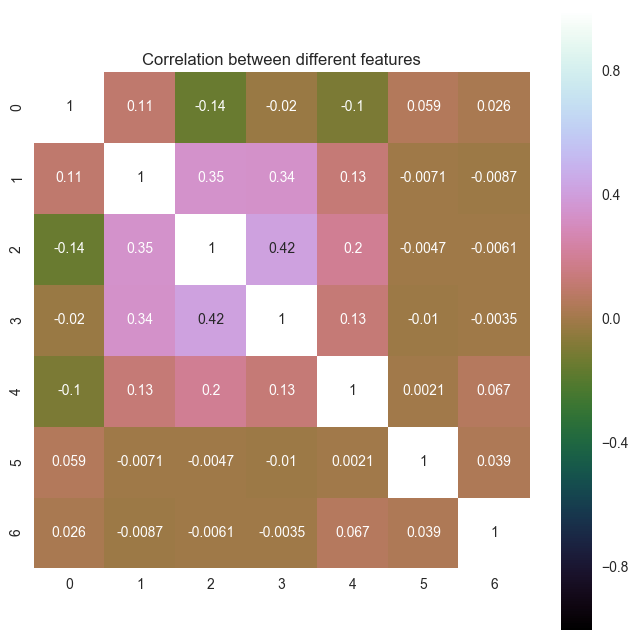

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

The same visualisation of the data using seaborn which was done above

## Eigen decomposition of the covariance matrix


In [50]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[ 1.83017431  0.54823098  0.63363587  0.84548166  1.12659606  0.95598647
  1.06036136]


Here we have used **np.linalg.eig(cov_mat)** to calculate eigen vectors and eigen values.It is one Numpy's Linear algebra function to directly calculate eigen vectors and eigen values.

# 6) Selecting Principal Components
The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes.
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order :

In [54]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

Make a list of (eigenvalue, eigenvector) tuples

In [55]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

Sort the (eigenvalue, eigenvector) tuples from high to low

In [56]:
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.83017431388
1.12659606399
1.06036136228
0.955986474007
0.845481663714
0.633635874483
0.548230976542


Visually confirm that the list is correctly sorted by decreasing eigenvalues

# Explained variance

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [60]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

First we are calculating the total of all the eigen values using **sum()** method and store it in **tot** variable. Then we are calculating variance ratio.**np.cum_sum** return the cumulative sum of the elements along a given axis. 
What is cumulative sum of elements?:
(https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)

## Visualisation

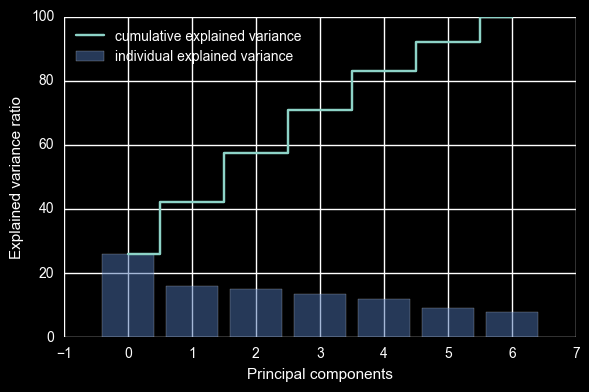

In [64]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(7), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone. The second,third,fourth and fifth principal component share equal amount of information.Comparatively 6th and 7th components share less amount of information as compared to the rest of the Principal components.But those information cannot be ignored.Hence it is not a good idea to drop any of the components. 

# Projection Matrix

The construction of the projection matrix that will be used to transform the Human resouces analytics data onto the new feature subspace.
**Suppose** only 1st and 2nd principal component shares the maximum amount of information say around 90%.Hence we can drop other components.
Here, we are reducing the 7-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [66]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[ 0.08797699,  0.79752505],
       [-0.50695734,  0.33180877],
       [-0.5788351 , -0.10338032],
       [-0.54901653,  0.10388959],
       [-0.31354922, -0.28404472],
       [ 0.01930249,  0.37489883],
       [-0.00996933,  0.10557298]]))


# Projection Onto the New Feature Space
In this last step we will use the 7 × 2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W where Y is a 14999 x 2 matrix of our transformed samples.



In [74]:
Y = X_std.dot(matrix_w)

# Principal Component Analysis in scikit-learn

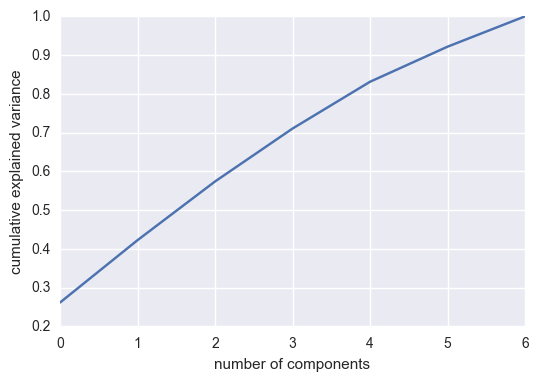

In [85]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

From the above plot we can see that 6 components explains more than 90% of variance.Hence we can drop the last component.

### Performing PCA with 6 components

In [86]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [87]:
print(Y_sklearn)

[[-1.90035018 -1.12083103  0.0797787   0.03228437 -0.07256447]
 [ 2.1358322   0.2493369  -0.0936161   0.50676925  1.2487747 ]
 [ 3.05891625 -1.68312693  0.301682   -0.4488635  -1.12495888]
 ..., 
 [-2.0507165  -1.182032    0.04594506  0.02441143 -0.01553247]
 [ 2.91418496 -1.42752606  0.36333357 -0.31517759 -0.97107375]
 [-1.91543672 -1.17021407  0.07024077  0.01486762 -0.09545357]]


**Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.**